In [80]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_name = "/home/system-gru/Downloads/Vietnam-Macroeconomic-Data.xls"
df = pd.read_excel(file_name)

In [5]:
df

,Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"GDP, current prices (Billions of U.S. dollars)",27.847,13.875,18.405,27.726,48.177,14.999,33.873,42.045,23.234,...,101.634,112.771,134.598,155.483,170.444,185.759,191.288,201.326,220.376,241.272
1,Unemployment rate (Percent),no data,no data,no data,no data,no data,no data,no data,no data,no data,...,4.600,4.300,4.500,2.700,2.800,2.100,2.300,2.300,2.200,2.200


In [42]:
df2 = df.T

In [43]:
df2[0:]

,0,1
Year,"GDP, current prices (Billions of U.S. dollars)",Unemployment rate (Percent)
1980,27.847,no data
1981,13.875,no data
1982,18.405,no data
1983,27.726,no data
1984,48.177,no data
1985,14.999,no data
1986,33.873,no data
1987,42.045,no data
1988,23.234,no data


In [71]:
df2.columns = ['GDP', 'Unemployment']

In [72]:
df_full_data = df2[11:][:]

In [73]:
df_full_data[:5]

,GDP,Unemployment
1990,6.472,12.3
1991,7.642,10.4
1992,9.867,11
1993,13.181,10.6
1994,16.312,10.3


In [66]:
df_full_data.dtypes

GDP             object
Unemployment    object
dtype: object

In [95]:
df_full_data['GDP'] = df_full_data['GDP'].astype('float')
df_full_data['Unemployment'] = df_full_data['Unemployment'].astype('float')
df_full_data['Year'] = df_full_data.index
df_full_data['Year'] = df_full_data['Year'].astype('float')

In [97]:
df_full_data['YearNormal'] = df_full_data['Year'] - 1990

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


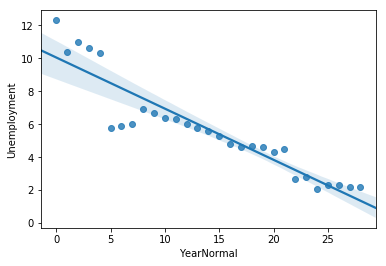

In [110]:
sns.regplot(x='YearNormal', y='Unemployment', data=df_full_data)

In [119]:
from scipy import stats
import scipy
import numpy as np

In [112]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_full_data['YearNormal'], y=df_full_data['Unemployment'])

In [113]:
slope, intercept, r_value, p_value, std_err

(-0.31019704433497536,
 10.046206896551723,
 -0.9251233386368036,
 7.201398297702993e-13,
 0.024499580683192322)

In [117]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [120]:
x_array = df_full_data['YearNormal']
y_array_exp = df_full_data['GDP']
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, y_array_exp, p0=[1,-0.5, 1])

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [121]:
popt_exponential, pcov_exponential

(array([ -78.45589291, -122.09036957,   84.92789293]), array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

https://nbviewer.jupyter.org/url/media.usm.maine.edu/~pauln/ScipyScriptRepo/CurveFitWith1SigmaBand.ipynb
    
http://scipyscriptrepo.com/wp/?p=104

http://emilygraceripka.com/blog/14